In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Term Deposit Subscription

In [166]:
train=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [167]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [168]:
train.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [169]:
train.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
16006,37101,58,blue-collar,married,secondary,no,6004,yes,no,cellular,13,may,133,1,274,6,failure,no


In [170]:
train.shape

(31647, 18)

In [171]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [172]:
train.columns.to_list()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [174]:
for i in train.columns:
    print(train[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [175]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [176]:
train.isnull()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31643,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [177]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [178]:
train.isnull().sum().sum()

0

<Axes: >

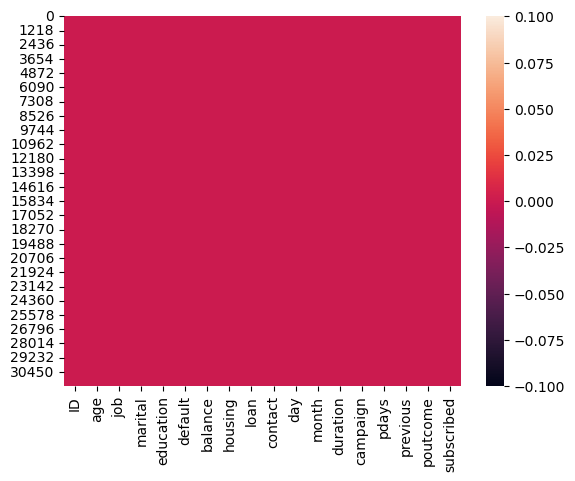

In [179]:
sns.heatmap(train.isnull())

In [180]:
categorical_col=[]

for i in train.dtypes.index:
    if train[i].dtypes=='object':
        categorical_col.append(i)
print('Categorical columns:',categorical_col)

numerical_col=[]

for i in train.dtypes.index:
    if train[i].dtypes!='object':
        numerical_col.append(i)
print('Numerical columns:',numerical_col)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical columns: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [181]:
train.nunique().to_frame('No.of.unique values')

,No.of.unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


<Axes: xlabel='subscribed', ylabel='count'>

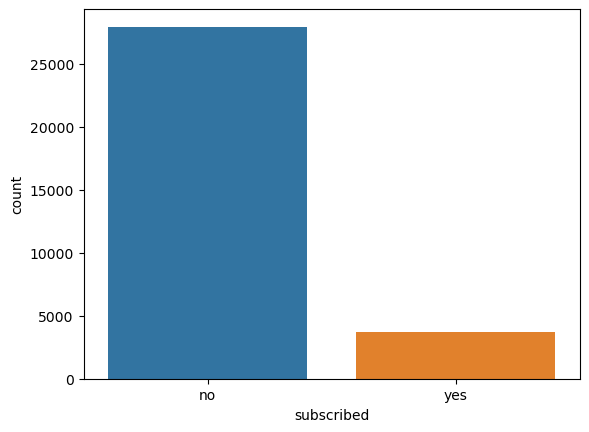

In [182]:
sns.countplot(x='subscribed',data=train)

<Axes: xlabel='marital', ylabel='count'>

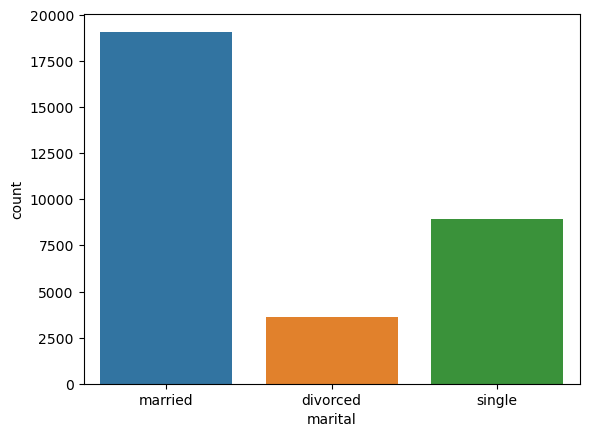

In [183]:
sns.countplot(x='marital',data=train)

<Axes: xlabel='job', ylabel='count'>

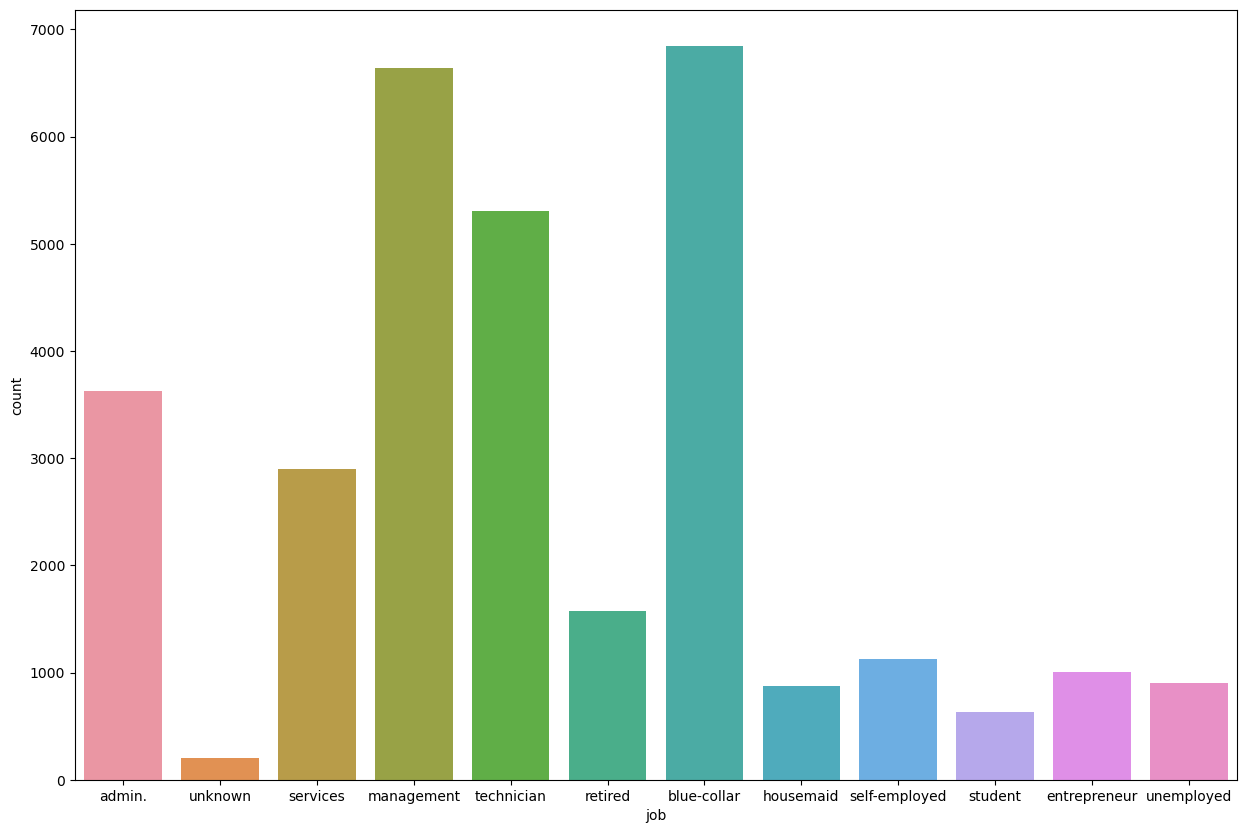

In [184]:
plt.figure(figsize=(15,10))
sns.countplot(x='job',data=train)

<Axes: xlabel='marital', ylabel='count'>

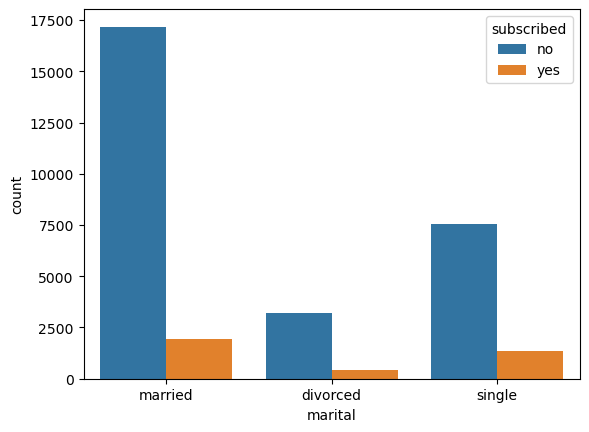

In [185]:
sns.countplot(x='marital',data=train,hue='subscribed')

<Axes: xlabel='marital', ylabel='age'>

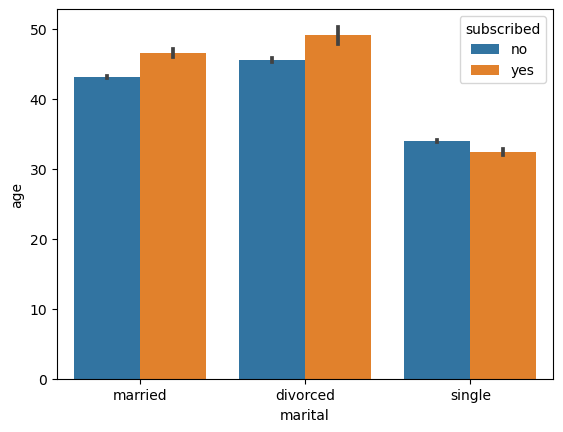

In [186]:
sns.barplot(x='marital',y='age',hue='subscribed',data=train)

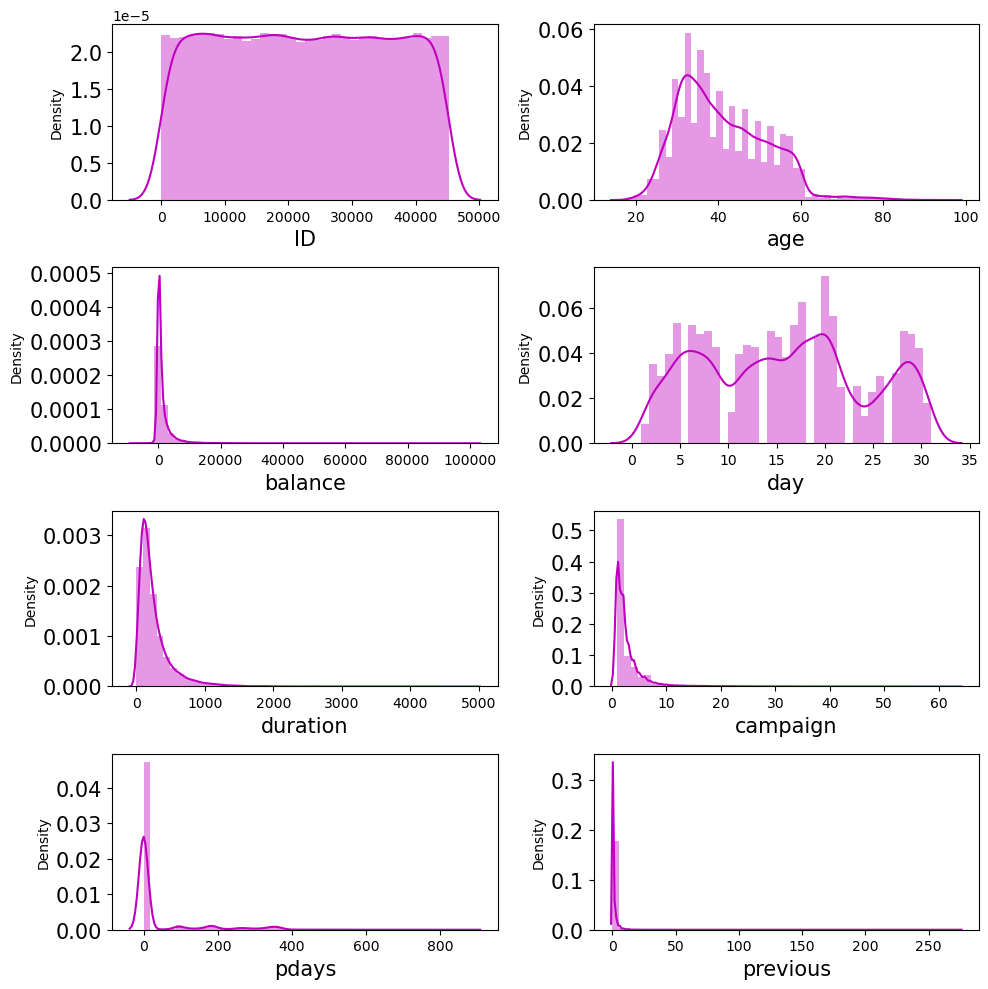

In [187]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.distplot(train[col],color='m')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=15)
    plotnumber+=1
plt.tight_layout()

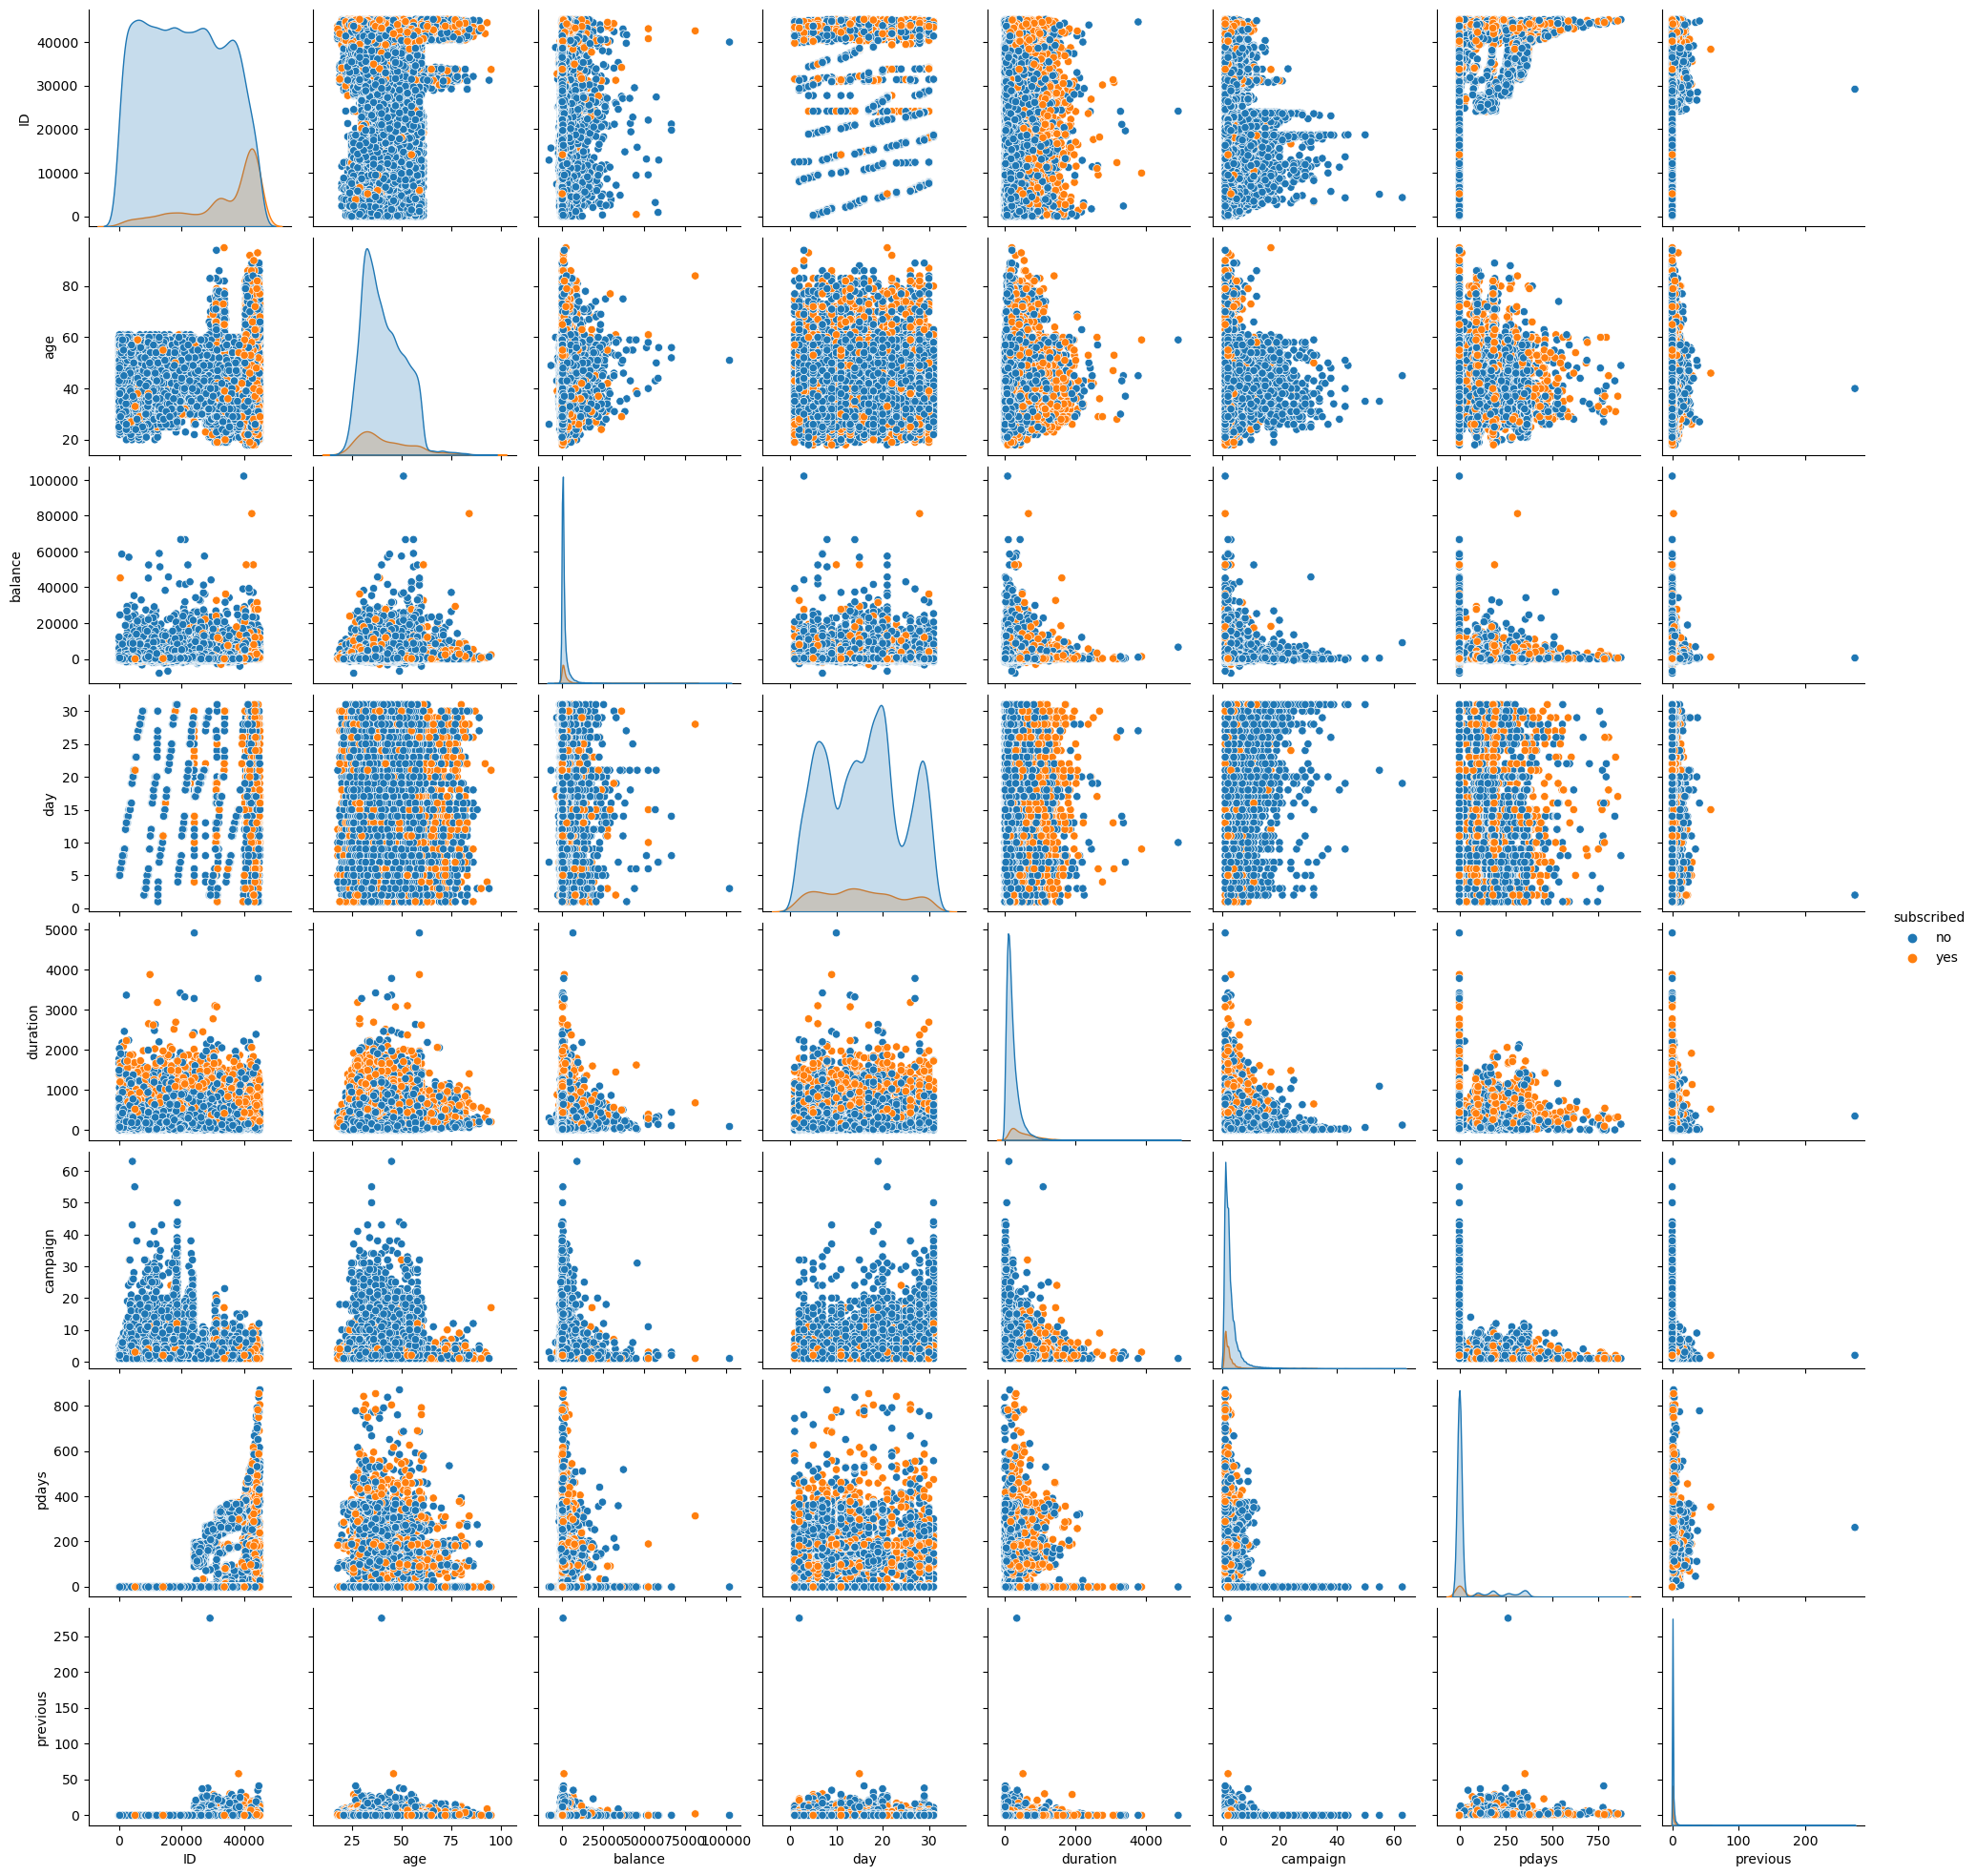

In [188]:
sns.pairplot(train,hue='subscribed')

In [189]:
# Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [190]:
cor=train.corr()

In [191]:
cor

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

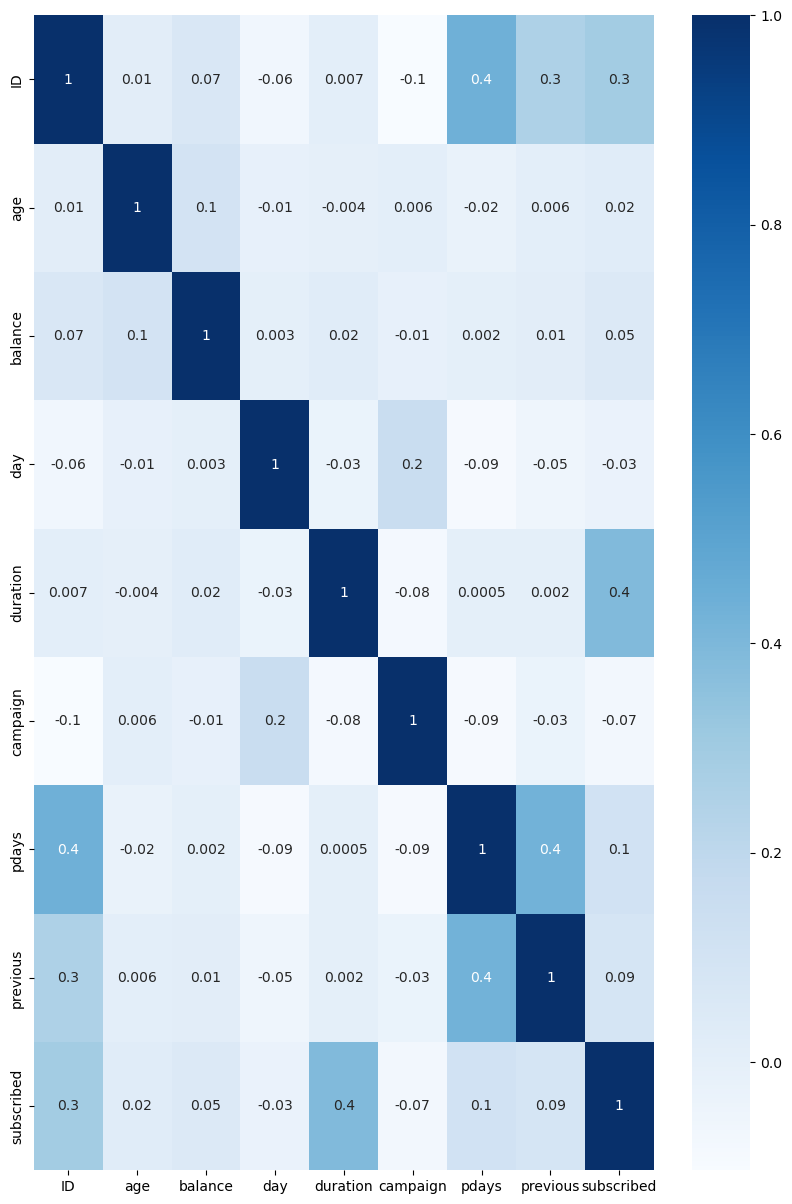

In [192]:
plt.figure(figsize=(10,15))
sns.heatmap(cor,fmt='.1g',annot=True,cmap='Blues')

In [193]:
cor['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.389838
ID            0.296663
pdays         0.108290
previous      0.088081
balance       0.050807
age           0.024538
day          -0.029600
campaign     -0.070607
Name: subscribed, dtype: float64

Text(0.5, 1.0, 'Correlation between target and feature')

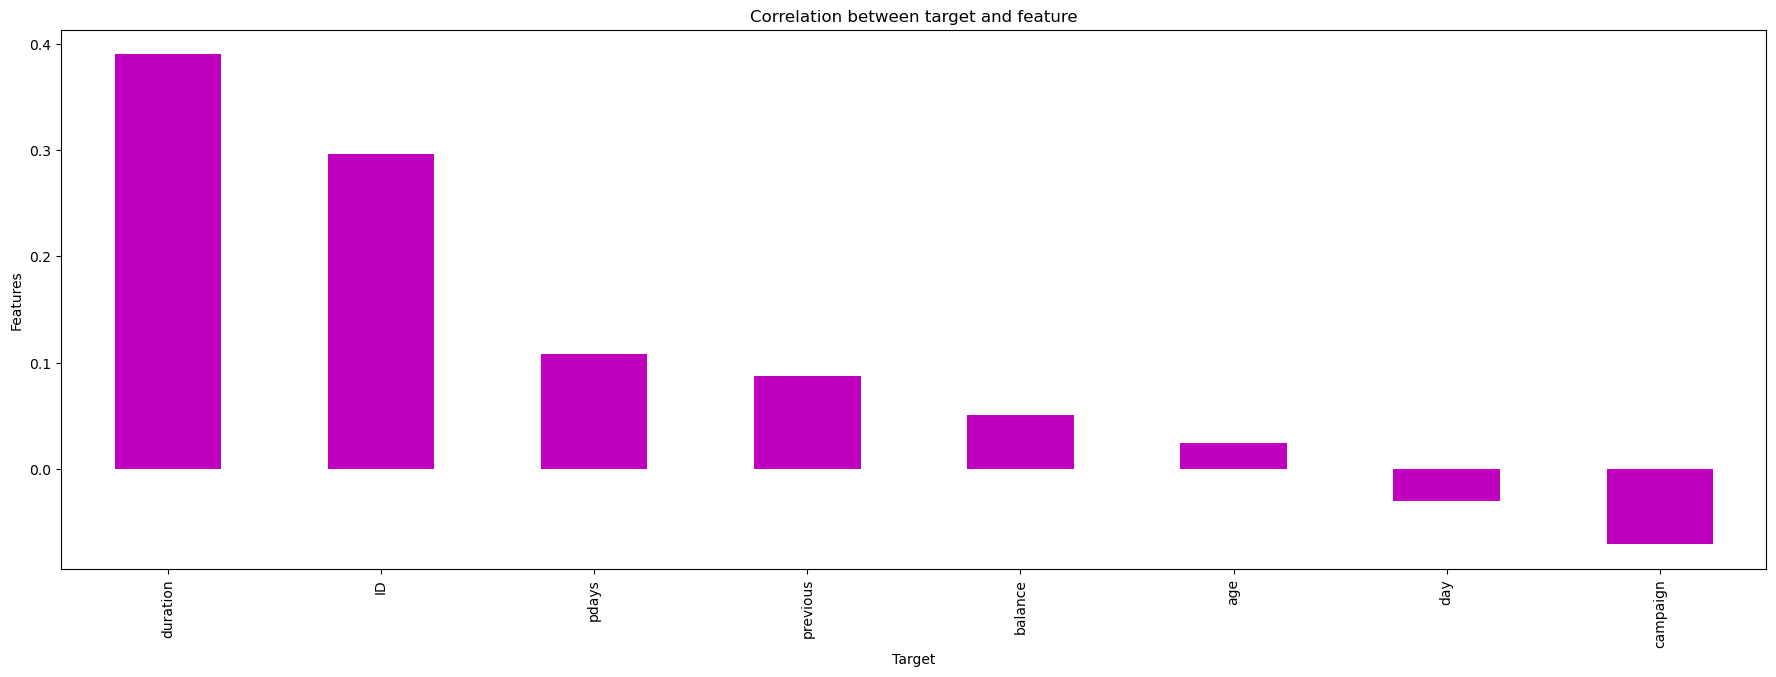

In [194]:
plt.figure(figsize=(22,7))
cor['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('Target')
plt.ylabel('Features')
plt.title('Correlation between target and feature')

In [195]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [196]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [198]:
x=train
y=target

In [199]:
maxAccu=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy is',maxAccu,'at random state', maxRs)

Best accuracy is 0.8983675618746709 at random state 10


In [200]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print('accuracy_score:', accuracy_score(y_test,pred_GBC))
print('confusion_matrix:',confusion_matrix(y_test,pred_GBC))
print('classficiation_report:',classification_report(y_test,pred_GBC))

accuracy_score: 0.9139547130068457
confusion_matrix: [[8078  308]
 [ 509  600]]
classficiation_report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95      8386
           1       0.66      0.54      0.59      1109

    accuracy                           0.91      9495
   macro avg       0.80      0.75      0.77      9495
weighted avg       0.91      0.91      0.91      9495



In [201]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print('accuracy_score:', accuracy_score(y_test,pred_ABC))
print('confusion_matrix:',confusion_matrix(y_test,pred_ABC))
print('classficiation_report:',classification_report(y_test,pred_ABC))

accuracy_score: 0.9055292259083728
confusion_matrix: [[8122  264]
 [ 633  476]]
classficiation_report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8386
           1       0.64      0.43      0.51      1109

    accuracy                           0.91      9495
   macro avg       0.79      0.70      0.73      9495
weighted avg       0.89      0.91      0.90      9495



In [202]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('accuracy_score:', accuracy_score(y_test,pred_ETC))
print('confusion_matrix:',confusion_matrix(y_test,pred_ETC))
print('classficiation_report:',classification_report(y_test,pred_ETC))

accuracy_score: 0.9047919957872564
confusion_matrix: [[8168  218]
 [ 686  423]]
classficiation_report:               precision    recall  f1-score   support

           0       0.92      0.97      0.95      8386
           1       0.66      0.38      0.48      1109

    accuracy                           0.90      9495
   macro avg       0.79      0.68      0.72      9495
weighted avg       0.89      0.90      0.89      9495



In [203]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)

print('accuracy_score:', accuracy_score(y_test,pred_DTC))

print('confusion_matrix:',confusion_matrix(y_test,pred_DTC))

print('classficiation_report:',classification_report(y_test,pred_DTC))

accuracy_score: 0.8844655081621906
confusion_matrix: [[7821  565]
 [ 532  577]]
classficiation_report:               precision    recall  f1-score   support

           0       0.94      0.93      0.93      8386
           1       0.51      0.52      0.51      1109

    accuracy                           0.88      9495
   macro avg       0.72      0.73      0.72      9495
weighted avg       0.89      0.88      0.89      9495



In [204]:
x1= GradientBoostingClassifier(max_depth=4, random_state=0)
x1

GradientBoostingClassifier(max_depth=4, random_state=0)

In [205]:
x1.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=0)

In [206]:
predict=x1.predict(x_test)

In [207]:
predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [208]:
accuracy_score(y_test,predict)
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [209]:
test=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [210]:
test=pd.get_dummies(test)
test

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13560,11743,54,2281,20,158,1,-1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
13561,28292,35,285,29,136,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13562,45163,29,464,9,208,2,91,3,1,0,...,0,0,0,1,0,0,0,0,1,0


In [211]:
test_pred = x1.predict(test)
test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [212]:
Final= pd.DataFrame()

In [213]:
Final['ID'] = test['ID']
Final['subscribed'] = test_pred

In [214]:
Final['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

In [215]:
Final['subscribed'].replace(0,'no',inplace=True)
Final['subscribed'].replace(1,'yes',inplace=True)

In [216]:
Final['subscribed']

0         no
1         no
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [217]:
Final['subscribed'].value_counts()

no     12269
yes     1295
Name: subscribed, dtype: int64

# Restaurant Food Cost

In [218]:
train1=pd.read_csv('Data_Train.csv')

In [219]:
train1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [220]:
train1.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [221]:
train1.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [222]:
train1.sample()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
9269,QUICK BITES,5441,North Indian,"11am – 11pm (Mon, Wed, Thu, Fri, Sat, Sun), Cl...",New Delhi,Shahdara,4.0,359 votes,600


In [223]:
train1.shape

(12690, 9)

In [224]:
train1.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [225]:
train1.columns.to_list()

['TITLE',
 'RESTAURANT_ID',
 'CUISINES',
 'TIME',
 'CITY',
 'LOCALITY',
 'RATING',
 'VOTES',
 'COST']

In [226]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [227]:
train1.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12685,False,False,False,False,False,False,False,False,False
12686,False,False,False,False,False,False,False,False,False
12687,False,False,False,False,False,False,False,False,False
12688,False,False,False,False,False,False,False,False,False


In [228]:
train1.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [229]:
train1.replace(0,'NA',inplace= True)

In [230]:
train1.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12685,False,False,False,False,False,False,False,False,False
12686,False,False,False,False,False,False,False,False,False
12687,False,False,False,False,False,False,False,False,False
12688,False,False,False,False,False,False,False,False,False


In [231]:
train1.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [232]:
train1['RATING'].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

In [233]:
for i in train1.columns:
    print(train1[i].value_counts())

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
QUICK BITES,BAR                1
MEAT SHOP                      1
SWEET SHOP,CONFECTIONERY       1
BEVERAGE SHOP,FOOD COURT       1
BAR,MICROBREWERY               1
Name: TITLE, Length: 113, dtype: int64
7264     8
4634     7
9910     6
11971    5
12747    5
        ..
9069     1
6573     1
7430     1
6381     1
6134     1
Name: RESTAURANT_ID, Length: 11892, dtype: int64
South Indian                                  532
North Indian                                  526
North Indian, Chinese                         501
Fast Food                                     286
Chinese                                       167
                                             ... 
Italian, Biryani, Fast Food                     1
Desserts, Juices, Fast Food                     1
Asian, Continental, European

In [234]:
train1.loc[train1["VOTES"]=="0"]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST


In [235]:
train1['CITY'].fillna('Missing', inplace=True)  
train1['LOCALITY'].fillna('Missing', inplace=True)  
train1['RATING'].fillna(3.8, inplace=True)  
train1['VOTES'].fillna(0.0, inplace=True) 

In [236]:
train1.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [237]:
train1.nunique().to_frame('no.of. unique values')

,no.of. unique values
TITLE,113
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,360
LOCALITY,1417
RATING,33
VOTES,1848
COST,86


In [238]:
categorical_col=[]

for i in train1.dtypes.index:
    if train1[i].dtypes=='object':
        categorical_col.append(i)
print('Categorical columns:',categorical_col)

numerical_col=[]

for i in train1.dtypes.index:
    if train1[i].dtypes!='object':
        numerical_col.append(i)
print('Numerical columns:',numerical_col)

Categorical columns: ['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']
Numerical columns: ['COST']


<Axes: >

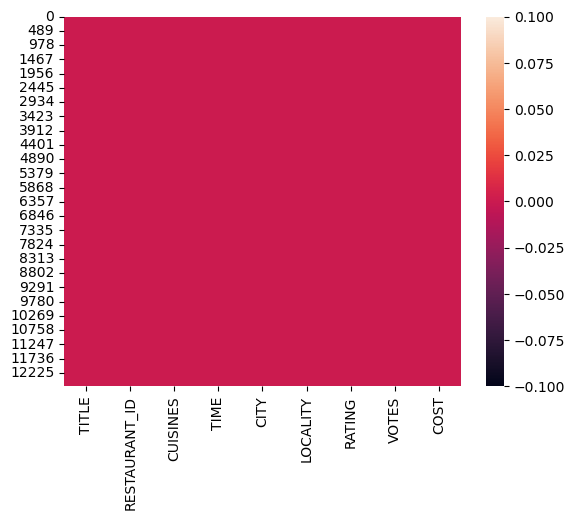

In [239]:
sns.heatmap(train1.isnull())

In [240]:
train1['VOTES'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12685    False
12686    False
12687    False
12688    False
12689    False
Name: VOTES, Length: 12690, dtype: bool

In [241]:
train1['VOTES'].isnull().sum()

0

In [242]:
train1['VOTES'].value_counts()

0.0           1204
44 votes        71
29 votes        66
28 votes        66
38 votes        65
              ... 
1020 votes       1
4634 votes       1
2297 votes       1
1475 votes       1
1214 votes       1
Name: VOTES, Length: 1848, dtype: int64

In [243]:
train1['VOTES'].nunique()

1848

In [244]:
train1.loc[train1["VOTES"]==" "]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST


In [245]:
train1['VOTES'] = train1['VOTES'].replace(np.nan, 0)

In [246]:
train1['VOTES'].isnull().sum()

0

<Axes: >

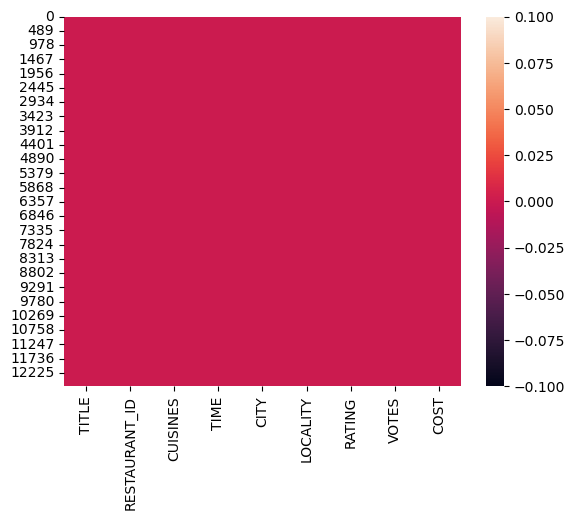

In [247]:
sns.heatmap(train1.isnull())

In [248]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  object
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 892.4+ KB


In [249]:
target = train1['COST']
train1 = train1.drop('COST', axis=1)

In [250]:
x=train1
y=target

In [251]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, r2_score

In [252]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 0.8917324907846235


In [253]:
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [254]:
Lasso=Lasso()
Lasso.fit(x_train,y_train)
pred=Lasso.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_Score: 0.23518055132179927
mean squared error: 0.07889607339520419
mean absolute error: 0.18322817278556375
root mean squared error: 0.2808844484751767


In [255]:
Ridge=Ridge()
Ridge.fit(x_train,y_train)
pred=Ridge.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_Score: 0.3322472162658143
mean squared error: 0.06888301902676998
mean absolute error: 0.16142918629295597
root mean squared error: 0.2624557467969981


In [256]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_Score: -0.12101366075151665
mean squared error: 0.11563981042654028
mean absolute error: 0.11563981042654028
root mean squared error: 0.3400585397053576


In [257]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred=ABR.predict(x_test)
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_Score:',r2_score(y_test,pred))

mean squared error: 0.08420777576283302
mean absolute error: 0.2005462179538582
root mean squared error: 0.2901857607857991
R2_Score: 0.1836888470895387


In [258]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_Score:',r2_score(y_test,pred))

mean squared error: 0.05777833729269049
mean absolute error: 0.12375271794930871
root mean squared error: 0.24037124888948447
R2_Score: 0.43989612952747004


In [259]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_Score:',r2_score(y_test,pred))

mean squared error: 0.05873091100579252
mean absolute error: 0.11611795681937861
root mean squared error: 0.24234461208327393
R2_Score: 0.4306618689270645


In [260]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_Score:',r2_score(y_test,pred))

mean squared error: 0.07281305950500264
mean absolute error: 0.12482359136387573
root mean squared error: 0.2698389510522946
R2_Score: 0.2941493583814494


In [261]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_Score:',r2_score(y_test,pred))

mean squared error: 0.08896818298030781
mean absolute error: 0.1666661450029251
root mean squared error: 0.2982753475906244
R2_Score: 0.13754140442385443


In [262]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)
print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_Score:',r2_score(y_test,pred))

mean squared error: 0.061181084781463925
mean absolute error: 0.11683622959452344
root mean squared error: 0.24734810446305006
R2_Score: 0.4069098559860921


In [271]:
x2= GradientBoostingRegressor(max_depth=4, random_state=0)
x2

GradientBoostingRegressor(max_depth=4, random_state=0)

In [272]:
x2.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, random_state=0)

In [273]:
predict1=x2.predict(x_test)

In [274]:
predict1

array([ 0.36168808, -0.01189856,  0.86113686, ...,  0.03159136,
        0.0087588 ,  0.01089899])

In [275]:
r2_score(y_test,predict1)
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [276]:
test1=pd.read_excel('Data_Test.xlsx')

In [277]:
test1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [278]:
test1_pred = x2.predict(test1)
test1_pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- CITY
- CUISINES
- LOCALITY
- RATING
- RESTAURANT_ID
- ...
Feature names seen at fit time, yet now missing:
- ID
- age
- balance
- campaign
- contact_cellular
- ...
